# Individual Assignment 1: ML Modeling Refresh (Spring 2024)


**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Full Name: Sharath Reddy Muthyala
* Student ID (7 digit number): 3134923

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero. This is a dataset on annual earnings (y) as a function of geographic and economic predictors.

**10 points each. 100 points**

  Use the file below to complete the following data wrangling and regression modeling. Good luck!


# Read the data

For some reason, gdown has recently been giving me issues - so here you can download and drag the file into your runtime.

Here is the link for:
* X_S24.csv = 'https://drive.google.com/file/d/10yZr6nZA1BV1Kp4C6UtLMKfynqFSPDY6/view?usp=drive_link'
* y_S24.csv = 'https://drive.google.com/file/d/1UXXQ_qr-vWg5RJTfSD5ESSc5Yeaev_1f/view?usp=drive_link'

# Q1. Explore the dataset
Get to know this new dataset! How many rows and columns are there? What are the data types of the columns in X (string vs numeric)? Are there any missing values?

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn
%pip install seaborn
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df_X = pd.read_csv('X_S24.csv')

#print(df_X.head())

df_X.info()

n_row = df_X.shape[0]
n_col = df_X.shape[1]

print("Number of Rows: ", n_row)
print("Number of Columns: ", n_col)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State Score                                5000 non-null   float64
 1   Education Score                            5000 non-null   float64
 2   Geography Score                            5000 non-null   float64
 3   Age (normalized)                           5000 non-null   float64
 4   Career Advancement Opportunity Score       5000 non-null   float64
 5   Job Satisfaction Score                     5000 non-null   float64
 6   Health and Wellness Program Quality Score  5000 non-null   float64
 7   Job Demand Score                           5000 non-null   float64
 8   Work Experience (normalized)        

In [3]:
df_X.head()

,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
0,-0.488983,-0.650489,1.188653,-0.424041,0.126153,0.079847,0.615604,-0.387655,0.172021,-0.071714
1,0.857803,-0.744886,0.012302,-0.603159,0.450438,-2.208105,-1.536246,0.659717,1.049996,-1.642319
2,1.504650,-1.542571,-1.429606,-0.184382,0.008916,-0.122821,-1.013401,-0.029866,-0.396784,2.152012
3,-0.636917,-0.639321,-0.569536,-0.050816,-0.547571,2.037834,0.100880,0.120171,0.125213,-0.622810
4,2.099281,0.244244,-0.314890,0.740922,-0.419488,1.010743,-0.064267,0.455424,-0.970213,-0.961485


In [4]:
missing_values = df_X.isnull().values.any()
print("Are there any missing values? ", missing_values)

Are there any missing values?  False


In [5]:
df_Y = pd.read_csv('Y_S24.csv')

print(df_Y.head())

df_Y.info()

n_row = df_Y.shape[0]
n_col = df_Y.shape[1]

print("Number of Rows: ", n_row)
print("Number of Columns: ", n_col)

   Annual Earnings
0        61.864768
1         0.000000
2         0.000000
3        68.108952
4       230.784497
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual Earnings  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB
Number of Rows:  5000
Number of Columns:  1


In [6]:
df_Y.head()

,Annual Earnings
0,61.864768
1,0.000000
2,0.000000
3,68.108952
4,230.784497


In [7]:
missing_values = df_Y.isnull().values.any()
print("Are there any missing values? ", missing_values)

Are there any missing values?  False


In [8]:
df_X.describe()

,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.028652,0.018241,0.015757,0.004890,0.012961,0.018218,-0.005375,-0.008035,0.016715,-0.016981
std,1.008419,0.985117,0.985917,0.998210,0.999196,1.009253,1.017983,0.996555,0.981910,1.017218
min,-3.581230,-3.696449,-4.199683,-3.429597,-4.281627,-3.618401,-3.740454,-3.838710,-3.611576,-4.088482
25%,-0.705773,-0.634969,-0.649327,-0.667627,-0.661581,-0.688040,-0.690529,-0.671862,-0.636700,-0.689913
50%,-0.020192,0.012030,0.003570,-0.007196,0.012131,0.025922,0.008622,-0.006657,0.018452,-0.025886
75%,0.631780,0.686435,0.676724,0.673112,0.685889,0.687442,0.676509,0.667588,0.687485,0.667343
max,3.561219,3.877207,3.691489,3.649854,3.609161,4.052979,3.595347,3.847528,3.693792,3.361579


# Q2. Split into X_train, X_test, y_train, y_test.
Before we do any cleaning, let's split the data so that we can use fit_transform() on train and transform() on test. Use an 80/20 split, shuffle the data, and random state equal to **YOUR STUDENT ID**. Print the shape of X_train, X_test, y_train, y_test and make sure it makes sense to you.

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, shuffle=True, random_state=3134923)



In [10]:
# Printing the shapes of the train and test sets
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (4000, 10)
Shape of y_train :  (4000, 1)
Shape of X_test :  (1000, 10)
Shape of y_test :  (1000, 1)


# Q3. Clean up the dataset.
Use your judgement on if any rows should be deleted - there are missing values in every column in X that need to get replaced!

Right now X and y are in different files, so be careful if you are dropping rows.

In [11]:
# Checking for missing values in the datasets
missing_values_in_df_Y = df_Y.isnull().sum()
print(missing_values_in_df_Y)


Annual Earnings    0
dtype: int64


In [12]:
missing_values_in_df_X = df_X.isnull().sum()
print(missing_values_in_df_X)


State Score                                  0
Education Score                              0
Geography Score                              0
Age (normalized)                             0
Career Advancement Opportunity Score         0
Job Satisfaction Score                       0
Health and Wellness Program Quality Score    0
Job Demand Score                             0
Work Experience (normalized)                 0
Company Size (normalized)                    0
dtype: int64


In [13]:
# Confirming the absence of missing values
print("The Data seems to have no missing values, no rows should be deleted")

The Data seems to have no missing values, no rows should be deleted


# Q4. Make three EDA plots and three EDA tables using X_train and y_train

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

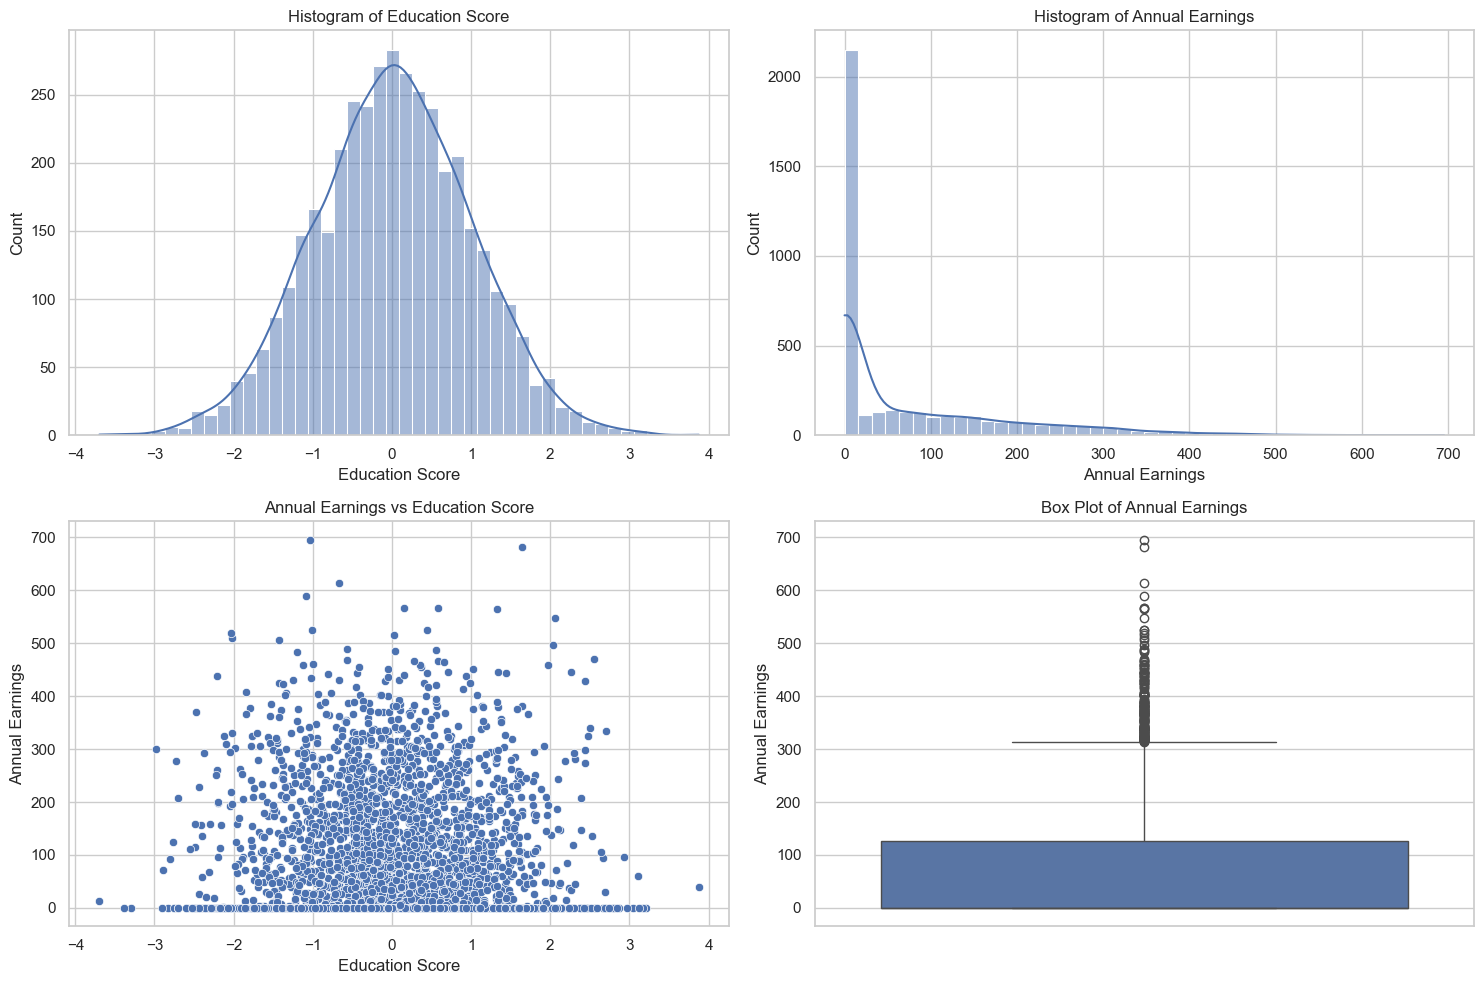

In [15]:
# Creating EDA plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram for 'Education Score'
sns.histplot(X_train['Education Score'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Education Score')

# Histogram for 'Annual Earnings'
sns.histplot(y_train['Annual Earnings'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Annual Earnings')

# Scatter plot for 'Annual Earnings' vs 'Education Score'
sns.scatterplot(x=X_train['Education Score'], y=y_train['Annual Earnings'], ax=axes[1, 0])
axes[1, 0].set_title('Annual Earnings vs Education Score')

# Box plot for 'Annual Earnings'
sns.boxplot(y=y_train['Annual Earnings'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Annual Earnings')

plt.tight_layout()
plt.show()

In [16]:
# Creating EDA tables

# Descriptive Statistics Table for X_train and y_train
desc_stats_X_train = X_train.describe()
desc_stats_y_train = y_train.describe()

# Correlation Matrix for features in X_train
correlation_matrix = X_train.corr()

# Table of Missing Values in X_train and y_train
missing_values_X_train = X_train.isnull().sum()
missing_values_y_train = y_train.isnull().sum()


In [17]:
desc_stats_X_train


,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.035497,0.012709,0.003680,0.009846,0.006475,0.012274,0.002986,-0.009077,0.016386,-0.018172
std,1.016712,0.984342,0.986078,0.996024,1.005947,1.010671,1.014576,0.995229,0.977874,1.020692
min,-3.581230,-3.696449,-4.199683,-3.429597,-4.281627,-3.570284,-3.740454,-3.687723,-3.481812,-4.088482
25%,-0.720732,-0.644565,-0.657707,-0.663486,-0.671412,-0.699026,-0.671348,-0.674008,-0.633371,-0.686437
50%,-0.030260,0.012519,-0.005911,-0.004604,0.013446,-0.002043,0.027168,-0.005677,0.017094,-0.026322
75%,0.637043,0.675973,0.676054,0.676464,0.681280,0.676930,0.680774,0.672110,0.685669,0.668438
max,3.561219,3.877207,3.209969,3.649854,3.609161,4.052979,3.595347,3.757058,3.693792,3.361579


In [18]:
desc_stats_y_train 

,Annual Earnings
count,4000.000000
mean,75.040245
std,110.258866
min,0.000000
25%,0.000000
50%,0.000000
75%,125.579254
max,695.450055


In [19]:
correlation_matrix 

,State Score,Education Score,Geography Score,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
State Score,1.000000,0.000719,-0.019482,0.005273,0.002576,-0.002091,-0.003514,-0.006814,-0.006269,-0.001102
Education Score,0.000719,1.000000,0.009797,0.009432,-0.021403,-0.006507,-0.002202,-0.001930,-0.010614,-0.001017
Geography Score,-0.019482,0.009797,1.000000,0.038460,0.003201,-0.023719,0.015042,-0.025957,-0.000884,0.004401
Age (normalized),0.005273,0.009432,0.038460,1.000000,-0.002170,0.020925,-0.014229,-0.017336,0.029373,-0.017856
Career Advancement Opportunity Score,0.002576,-0.021403,0.003201,-0.002170,1.000000,-0.030970,0.007011,-0.017191,-0.007796,-0.016104
Job Satisfaction Score,-0.002091,-0.006507,-0.023719,0.020925,-0.030970,1.000000,0.005842,0.001745,-0.020727,-0.011042
Health and Wellness Program Quality Score,-0.003514,-0.002202,0.015042,-0.014229,0.007011,0.005842,1.000000,0.009614,0.002718,0.001372
Job Demand Score,-0.006814,-0.001930,-0.025957,-0.017336,-0.017191,0.001745,0.009614,1.000000,-0.011038,0.009562
Work Experience (normalized),-0.006269,-0.010614,-0.000884,0.029373,-0.007796,-0.020727,0.002718,-0.011038,1.000000,0.011550
Company Size (normalized),-0.001102,-0.001017,0.004401,-0.017856,-0.016104,-0.011042,0.001372,0.009562,0.011550,1.000000


In [20]:
missing_values_X_train 

State Score                                  0
Education Score                              0
Geography Score                              0
Age (normalized)                             0
Career Advancement Opportunity Score         0
Job Satisfaction Score                       0
Health and Wellness Program Quality Score    0
Job Demand Score                             0
Work Experience (normalized)                 0
Company Size (normalized)                    0
dtype: int64

In [21]:
missing_values_y_train

Annual Earnings    0
dtype: int64

# Q5. Subset columns for X
Use every column in `X` except 'State Score' to build your model.

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [22]:
X_train.drop(['State Score'],axis=1,inplace=True)
X_test.drop(['State Score'],axis=1,inplace=True)
X_train.columns

Index(['Education Score', 'Geography Score', 'Age (normalized)',
       'Career Advancement Opportunity Score', 'Job Satisfaction Score',
       'Health and Wellness Program Quality Score', 'Job Demand Score',
       'Work Experience (normalized)', 'Company Size (normalized)'],
      dtype='object')

# Q6. Use fit_transform() from StandardScaler() on X_train. Use transform() to apply that StandardScaler() to X_test.


In [23]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train_scaled =scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Q7. Fit a random forest regressor (or any other sklearn) model on X_train. Call your model object `clf`.

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

clf = GradientBoostingRegressor()
clf.fit(X_train_scaled, y_train)

train_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

print("Performance on Training Data:")
print("R2 Score:", r2_score(y_train, train_preds))
print("Mean Absolute Error:", mean_absolute_error(y_train, train_preds))

print("Performance on Test Data:")
print("R2 Score:", r2_score(y_test, test_preds))
print("Mean Absolute Error:", mean_absolute_error(y_test, test_preds)) 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Performance on Training Data:
R2 Score: 0.8073381613183458
Mean Absolute Error: 35.14562278492242
Performance on Test Data:
R2 Score: 0.7223658520705926
Mean Absolute Error: 41.150123321339166


# Q8. Make two scatterplots of actual vs. predicted. One for train results, one for test results.
With nicely labeled title and axis (like we did in class).

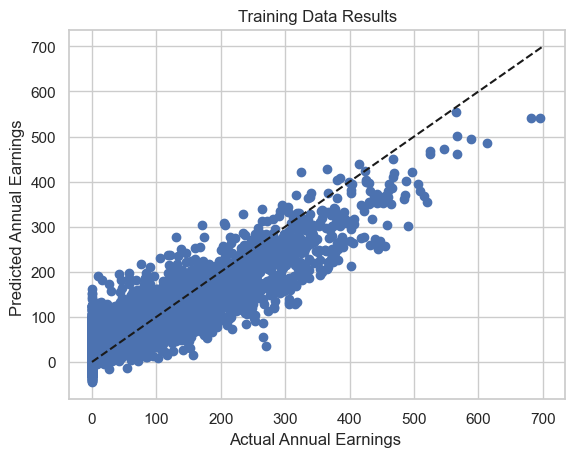

In [25]:
plt.scatter(y_train,train_preds)
plt.plot([0, 700], [0, 700], '--k')
plt.xlabel('Actual Annual Earnings ')
plt.ylabel('Predicted Annual Earnings ')
plt.title('Training Data Results')
plt.show()

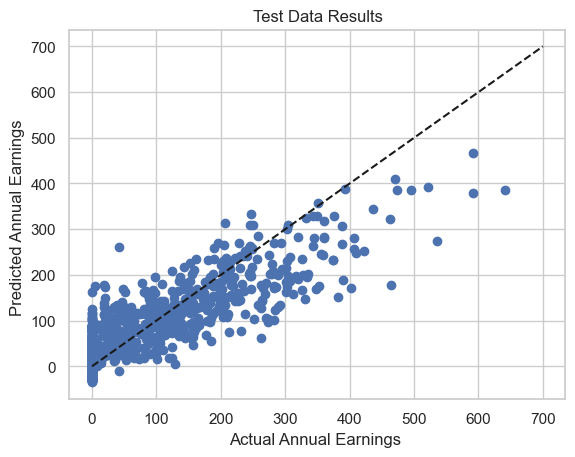

In [26]:
plt.scatter(y_test,test_preds)
plt.plot([0, 700], [0,700], '--k')
plt.xlabel('Actual Annual Earnings ')
plt.ylabel('Predicted Annual Earnings ')
plt.title('Test Data Results')
plt.show()

# Q9. Try a simple model - does it work?

Examine variable importance and build a simpler model (you can use tree importance from random forest or permutation importance.) You are building a model with less features, so it should be as good or slightly less better than your current model.

* https://scikit-learn.org/stable/modules/permutation_importance.html
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

Were you able to get similar results?

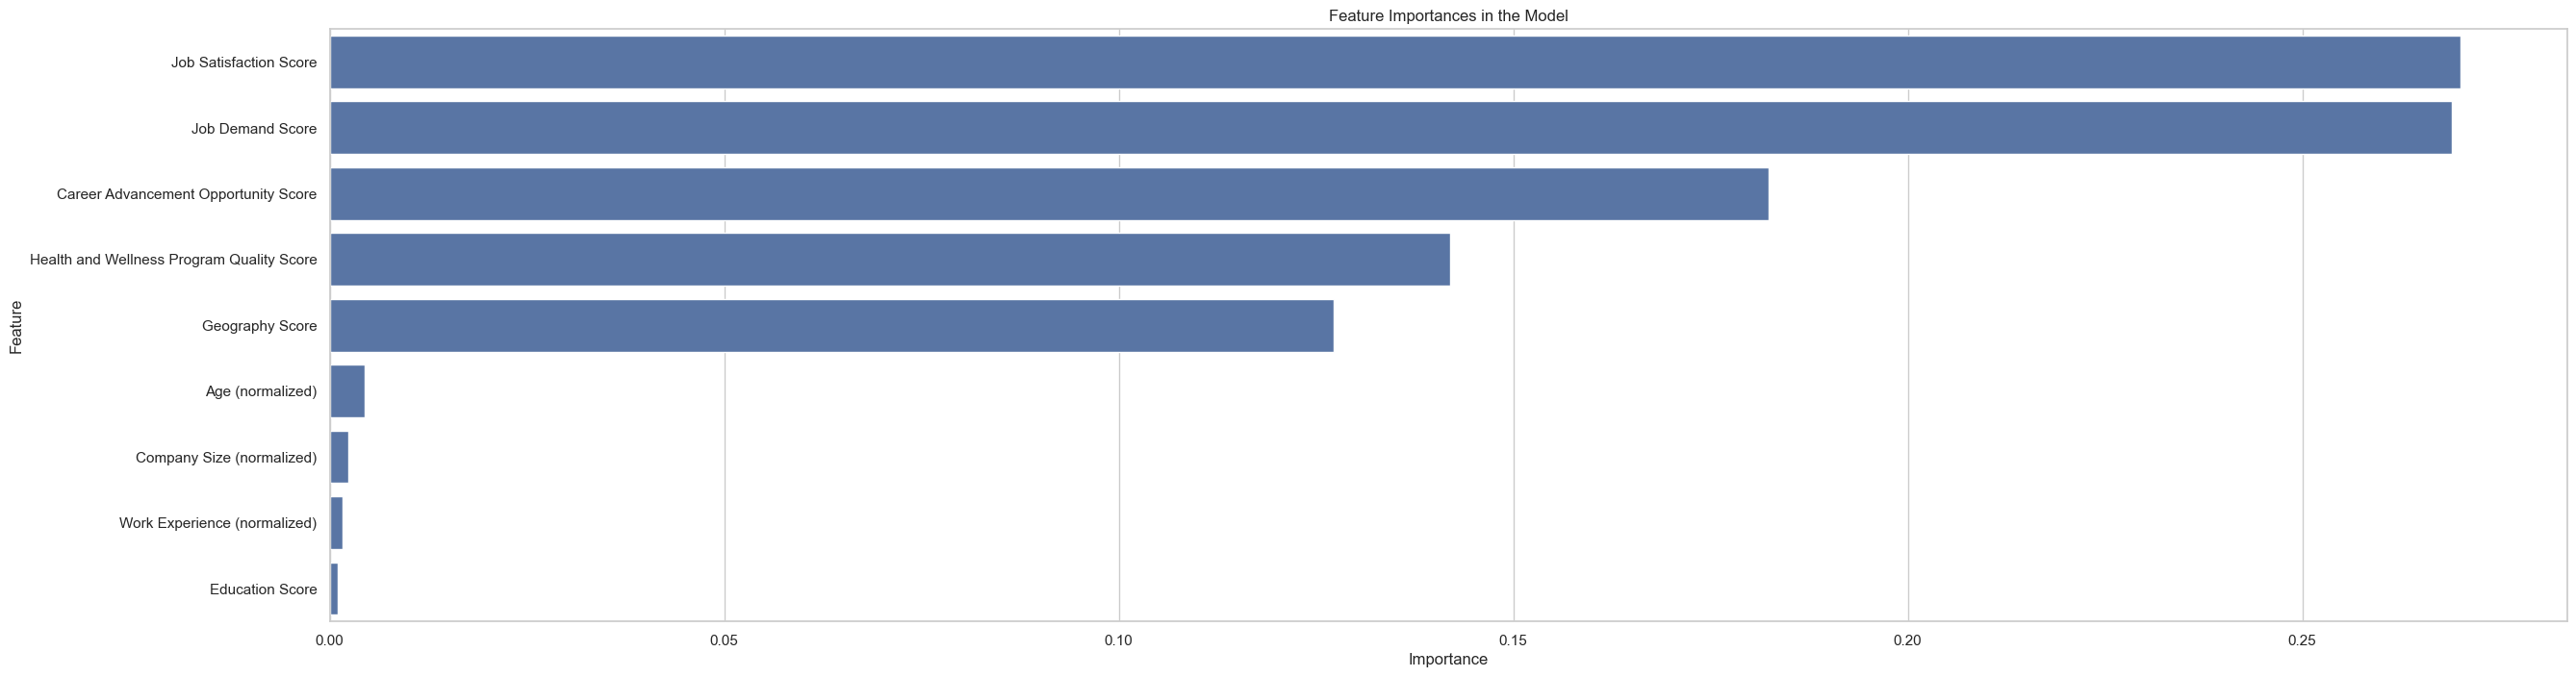

In [27]:
# Convert feature importances to a DataFrame for easier manipulation and visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Set up the matplotlib figure with a specified size
plt.figure(figsize=(30, 8))

# Use seaborn's barplot for a more visually appealing bar chart and easier customization
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)

# Add titles and labels for clarity
plt.title('Feature Importances in the Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Display the plot
plt.show()

In [28]:
# Selecting features
X_train_selected = X_train[['Geography Score', 'Career Advancement Opportunity Score', 'Job Satisfaction Score', 'Health and Wellness Program Quality Score', 'Job Demand Score']]
X_test_selected = X_test[['Geography Score', 'Career Advancement Opportunity Score', 'Job Satisfaction Score', 'Health and Wellness Program Quality Score', 'Job Demand Score']]

# Scaling the data
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Create and train the GradientBoosting model
rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(X_train_selected_scaled, y_train.values.reshape(-1))

# Making predictions
train_preds = rf_regressor.predict(X_train_selected_scaled)
test_preds = rf_regressor.predict(X_test_selected_scaled)

# Evaluating the model
print('For model with GradientBoostingRegressor')
print("-------------------------------------------")
print("Performance on Training Data:")
print("R2 Score:", r2_score(y_train, train_preds))
print("Mean Absolute Error:", mean_absolute_error(y_train, train_preds))
print("Performance on Test Data:")
print("R2 Score:", r2_score(y_test, test_preds))
print("Mean Absolute Error:", mean_absolute_error(y_test, test_preds))

For model with GradientBoostingRegressor
-------------------------------------------
Performance on Training Data:
R2 Score: 0.806101792462953
Mean Absolute Error: 34.96029946443076
Performance on Test Data:
R2 Score: 0.7249820447127571
Mean Absolute Error: 40.86226489553197


# Q10. Five good bullets
Write five good bullets about what you learned in this assignment. Make sure comments on the shape of the data and the results of your experiments. Be quantitative and tell a story of what you saw!

1. Exploring and understanding the dataset is a crucial initial step in the data analysis and modeling process.
2. Visualizing variables and data plays a vital role in the analytical phase, aiding in the interpretation of trends and patterns.
3. Evaluating the model's performance using various metrics post-training is essential for assessing its effectiveness.
4. Benchmarking the model against established base models provides a comparative perspective on its performance.
5. Visual inspection of plots comparing actual versus predicted outcomes offers an intuitive assessment of model accuracy.